# Assignment 2

---

**Gaurav Mukesh Shipurkar**

**E032|E1|B.Tech(CS)**

Select a dataset for classification and use logistic regression, SVM, decision tree and ensemble learning for classification. Compare the performance of these algorithms and comment in detail on each element of confusion matrix for each algorithm. Plot the ROC, AUC curve for each algorithm.

What is the effect on performance by varying kernels in SVM?

Insurance Companies place a lot of importance on data science & machine learning as it helps to keep the premium low. Using this data, we have to predict whether the person is a safe driver or not.

Suppose, he is not a safe driver. Then, Insurance company will not select the person fit for insurance as they have to pay the person if he/she meets an accident. So, that's like a loss for them. 


Our goal is to predict a binary outcome of 1, to indicate safe driver, or 0, to indicate that the drivers' data needs a review. We will also look at the continuous variables and fill in the missing data with the mean or median in order to obtain better results. 

## Preprocessing

Importing the libraires 

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np
import pandas as pd
import pylab

Importing the safe driver data & it is an excel file. Hence, we are using read_excel from pandas


In [ ]:
safe_driver = pd.read_excel('/content/drive/MyDrive/Machine Learning Labs/IT_3.xlsx')

Exploring the data, using different techniques

In [ ]:
safe_driver

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.0,5,<18,IL
1,2,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.0,3,>40,CT
3,4,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,CT
4,5,1,M,128,771,33,1,Married,Van,14183.0,4,>40,WY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,30236,1,F,398,491,6,3,Single,Truck,14509.0,2,35-40,VT
30236,30237,0,M,128,745,22,4,Single,Utility,8597.0,6,>40,OK
30237,30238,0,M,89,523,4,1,Married,Truck,49747.0,2,<18,NY
30238,30239,1,F,129,703,14,1,Married,Truck,7553.0,1,>40,NJ


There are essentially 13 columns in the dataset out of which only some are going to be useful. 

In [ ]:
safe_driver.columns

Index(['ID', 'target', 'Gender', 'EngineHP', 'credit_history',
       'Years_Experience', 'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket', 'State'],
      dtype='object')

In [ ]:
safe_driver.describe()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.000000,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,15120.500000,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,8729.680407,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,1.000000,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,7560.750000,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,15120.500000,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,22680.250000,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,30240.000000,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


From, this function is clear that there are outliers present in the dataset in the columns EngineHP & Miles Driven Annually

In [ ]:
true_claims = (safe_driver['target'] == 1).sum()
print('True Claims is  {}'.format(true_claims))

total_records = len(safe_driver['target'])

print('The percentage of true claims is {}%'.format(
    round(true_claims / total_records * 100), 2))

True Claims is  21396
The percentage of true claims is 71%


From calculating this we have come on the conclusion that the dataset is indeed imbalanced. 

We will balance it later using SMOTE technique.

Here, It is observed that the dataset has some null values as well in the column of Miles Driven Annually.

In [ ]:
safe_driver.isnull().sum()

ID                       0
target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehical_type             0
Miles_driven_annually    8
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

The Miles_driven_annually feature has some null values. Let us explore which particular cells have NaN and ingest them with the median data.

In [ ]:
safe_driver[safe_driver.isnull().any(axis=1)]

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,State
1235,1236,1,F,124,793,27,0,Married,Truck,NaN,3,>40,NJ
7365,7366,0,F,465,696,5,0,Married,Truck,NaN,8,18-27,SD
11464,11465,1,F,137,787,18,1,Married,Truck,NaN,1,>40,CT
18158,18159,0,F,108,747,8,1,Married,Truck,NaN,1,18-27,OR
19795,19796,1,F,121,774,19,0,Married,Truck,NaN,2,28-34,NY
25731,25732,1,F,355,694,15,1,Married,Truck,NaN,5,28-34,CT
26512,26513,1,F,109,743,40,0,Married,Truck,NaN,1,>40,OR
27045,27046,1,F,83,784,21,0,Married,Truck,NaN,1,>40,CT


It may make sense to ingest the median of  `Vehicle_Type=='Truck'` as all the NaN values are for Truck only. Let us look at the median of Miles_driven_annually by each vehicle type. 

In [ ]:
median_values = safe_driver.groupby('Vehical_type').median()
median_values

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
Vehical_type,,,,,,,,
Car,15246.5,1.0,148.0,695.0,7.0,1.0,13147.5,4.0
Truck,14971.5,1.0,150.0,694.0,8.0,1.0,12370.5,5.0
Utility,15388.0,1.0,132.0,741.0,14.0,1.0,11117.0,5.0
Van,14913.0,1.0,128.0,721.0,15.0,1.0,11272.0,5.0


Here, we have filled the null values with the median values.


In [ ]:
safe_driver.fillna( median_values.loc['Truck', 'Miles_driven_annually'], inplace=True)

From this, it is clear that there are no null values present in the dataset now. Thus, we can move ahead.


In [ ]:
safe_driver[safe_driver.isnull().any(axis=1)]

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,State


In [ ]:
safe_driver.drop([ 'ID', 'size_of_family', 'Marital_Status','State'], axis=1, inplace=True)

In [ ]:
safe_driver

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Vehical_type,Miles_driven_annually,Age_bucket
0,1,F,522,656,1,0,Car,14749.0,<18
1,1,F,691,704,16,0,Car,15389.0,28-34
2,1,M,133,691,15,0,Van,9956.0,>40
3,1,M,146,720,9,0,Van,77323.0,18-27
4,1,M,128,771,33,1,Van,14183.0,>40
...,...,...,...,...,...,...,...,...,...
30235,1,F,398,491,6,3,Truck,14509.0,35-40
30236,0,M,128,745,22,4,Utility,8597.0,>40
30237,0,M,89,523,4,1,Truck,49747.0,<18
30238,1,F,129,703,14,1,Truck,7553.0,>40


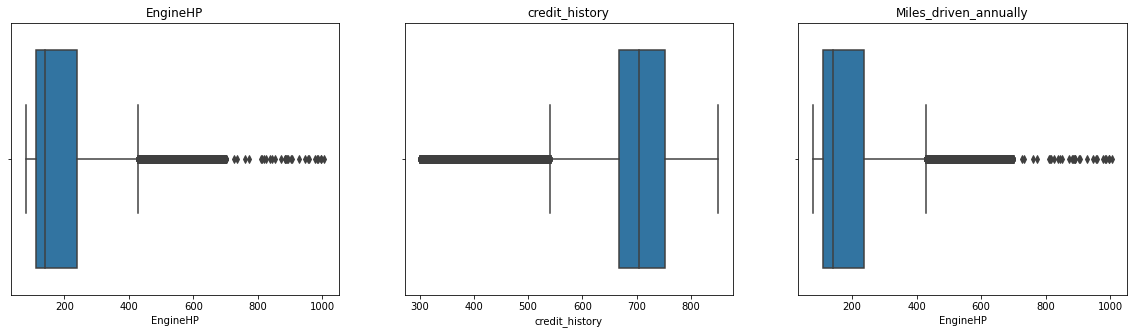

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("EngineHP")
sns.boxplot(x='EngineHP', data=safe_driver)

plt.subplot(132)
plt.title("credit_history")
sns.boxplot(x='credit_history', data=safe_driver)

plt.subplot(133)
plt.title("Miles_driven_annually")
sns.boxplot(x='EngineHP', data=safe_driver)


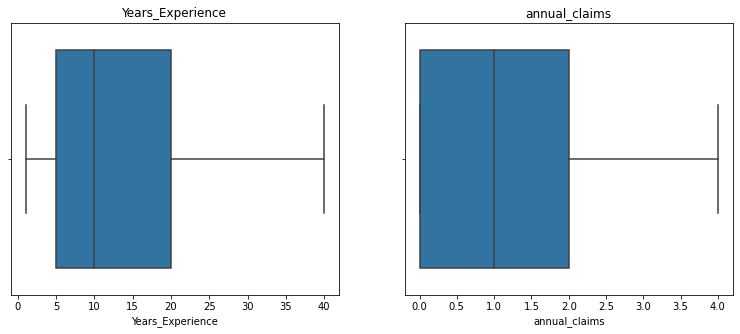

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("Years_Experience")
sns.boxplot(x='Years_Experience', data=safe_driver)

plt.subplot(132)
plt.title("annual_claims")
sns.boxplot(x='annual_claims', data=safe_driver)

In [ ]:
for col in ['EngineHP', 'credit_history', 'Miles_driven_annually']:
    Q1 = safe_driver[col].quantile(0.25)
    Q3 = safe_driver[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5) 
    safe_driver[col] = np.where(safe_driver[col] >= upper_bound,
                         upper_bound, safe_driver[col])
    safe_driver[col] = np.where(safe_driver[col] <= lower_bound,
                         lower_bound, safe_driver[col])

Here, we are calculating the lower and upper bound. So, if we find any outlier below the lower bound we are going to replace it with the lower bound and for outliers above the upper bound we replace them with the upperbound

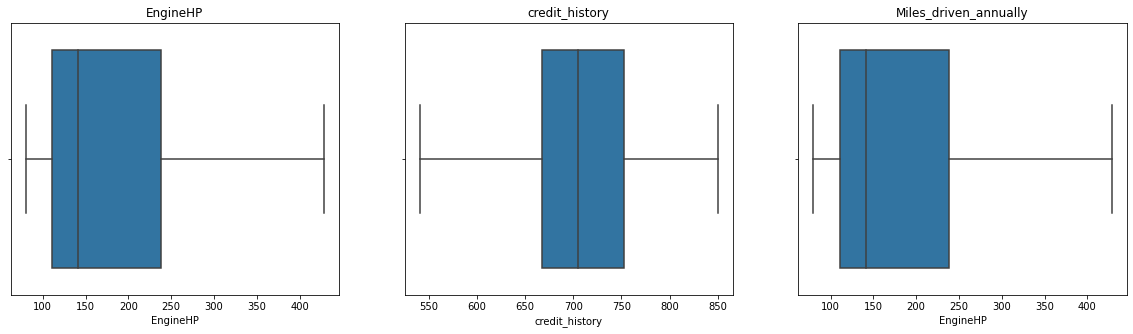

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.title("EngineHP")
sns.boxplot(x='EngineHP', data=safe_driver)

plt.subplot(132)
plt.title("credit_history")
sns.boxplot(x='credit_history', data=safe_driver)

plt.subplot(133)
plt.title("Miles_driven_annually")
sns.boxplot(x='EngineHP', data=safe_driver)


We have made use of pandas profiling, thus giving some basic information about the data and from this we can come on this conclusion of which features to keep and throw away.


In [ ]:
from pandas_profiling import ProfileReport
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
profile = ProfileReport(safe_driver, title = 'Report')

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The features are not highly correlated to the target variable. That is why we keep the remaining features. 

Lets, normalise the dataset so that we can achieve higher accuracy. For normalising the dataset we have made use of Standard Scaler.


In [ ]:
Standard = StandardScaler()
columns = ['EngineHP', 'credit_history', 'Years_Experience', 'annual_claims', 'Miles_driven_annually']
for column in columns:
  safe_driver[column] = pd.DataFrame(Standard.fit_transform(safe_driver[[column]]))

In [ ]:
safe_driver

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Vehical_type,Miles_driven_annually,Age_bucket
0,1,F,2.146006,-0.526858,-1.239193,-1.051311,Car,0.349448,<18
1,1,F,2.146006,0.104609,0.277478,-1.051311,Car,0.478189,28-34
2,1,M,-0.499023,-0.066414,0.176366,-1.051311,Van,-0.614702,>40
3,1,M,-0.382660,0.315097,-0.430302,-1.051311,Van,1.855744,18-27
4,1,M,-0.543779,0.986030,1.996371,-0.127860,Van,0.235593,>40
...,...,...,...,...,...,...,...,...,...
30235,1,F,1.873000,-2.046323,-0.733636,1.719041,Truck,0.301170,35-40
30236,0,M,-0.543779,0.643986,0.884146,2.642492,Utility,-0.888075,>40
30237,0,M,-0.892869,-2.046323,-0.935859,-0.127860,Truck,1.855744,<18
30238,1,F,-0.534828,0.091453,0.075255,-0.127860,Truck,-1.098084,>40


Let us convert some of the categorical features into numeric giving weightage to each variable.<br>
1. Gender: 1 = Female and 2 = Male<br>
2. Vehicle_Type: Use `LabelEncoder`<br>
3. Age_bucket: Use `LabelEncoder`<br>

In [ ]:
le = LabelEncoder()

safe_driver['Gender'] = np.where(safe_driver['Gender'] == 'F', 1, 2)

le.fit(safe_driver['Vehical_type'])
safe_driver['Vehical_type'] = le.transform(safe_driver['Vehical_type'])

le.fit(safe_driver['Age_bucket'])
safe_driver['Age_bucket'] = le.transform(safe_driver['Age_bucket'])

In [ ]:
safe_driver

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Vehical_type,Miles_driven_annually,Age_bucket
0,1,1,2.146006,-0.526858,-1.239193,-1.051311,0,0.349448,3
1,1,1,2.146006,0.104609,0.277478,-1.051311,0,0.478189,1
2,1,2,-0.499023,-0.066414,0.176366,-1.051311,3,-0.614702,4
3,1,2,-0.382660,0.315097,-0.430302,-1.051311,3,1.855744,0
4,1,2,-0.543779,0.986030,1.996371,-0.127860,3,0.235593,4
...,...,...,...,...,...,...,...,...,...
30235,1,1,1.873000,-2.046323,-0.733636,1.719041,1,0.301170,2
30236,0,2,-0.543779,0.643986,0.884146,2.642492,2,-0.888075,4
30237,0,2,-0.892869,-2.046323,-0.935859,-0.127860,1,1.855744,3
30238,1,1,-0.534828,0.091453,0.075255,-0.127860,1,-1.098084,4


Let's move ahead with the division of the dataset into training part and testing part. 

In [ ]:
X = safe_driver.drop(['target'], 1)
y = safe_driver['target']

We found out much earlier that our target label is 70% success (good driver or `target` == 1) and 30% failure (bad driver or `target` == 0). Let us do class balancing using SMOTE and see the distribution.<br>

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

columns = X.columns
X, y = os.fit_sample(X, y)
X_new = pd.DataFrame(data=X, columns=columns)
y_new = pd.DataFrame(data=y, columns=['y'])

# Split the resulting balanced data set as train and test
print("Proportion of negative class in oversampled data is ",
      len(y_new[y_new['y'] == 0])/len(X_new))
print("Proportion of positive class in oversampled data is ",
      len(y_new[y_new['y'] == 1])/len(X_new))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Proportion of negative class in oversampled data is  0.5
Proportion of positive class in oversampled data is  0.5


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.3, random_state=0)


## Decision Trees



Using, Gini Index as a criteria in Decision Tree with all the other parameters. We have obtained an accuracy of 69%

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf_gini.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  69.09175884094095


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      6418
           1       0.69      0.68      0.69      6420

    accuracy                           0.69     12838
   macro avg       0.69      0.69      0.69     12838
weighted avg       0.69      0.69      0.69     12838



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
Decision_gini_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

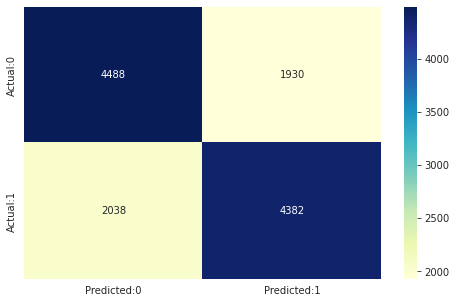

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

Using, Entropy as a criteria in Decision Tree with all the other parameters. We have obtained a accuracy of 69%

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf_gini.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  69.09175884094095


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      6418
           1       0.69      0.68      0.69      6420

    accuracy                           0.69     12838
   macro avg       0.69      0.69      0.69     12838
weighted avg       0.69      0.69      0.69     12838



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
Decision_entropy_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

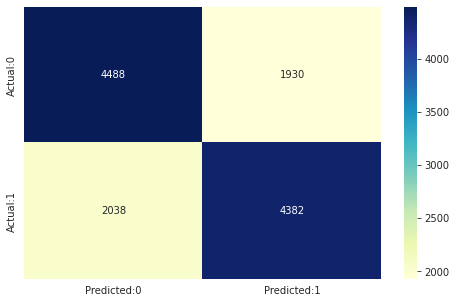

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

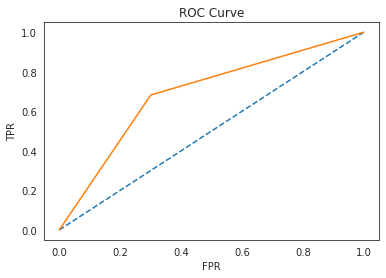

0.6909486219151937


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf_gini.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

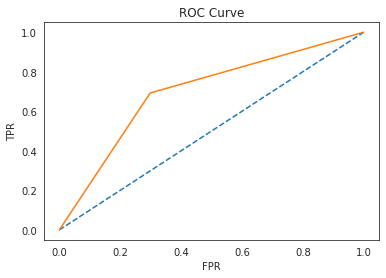

0.6970246502972074


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf_entropy.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

Our confusion matrix based on the **DecisionTree does not look good**. It is showing a high number of false positives and false negatives

## Logistic Regression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.5, random_state=5)

We have observed that the training accuracy that we have achieved is of 50% which is not promising. 

In [ ]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have observed that the accuracy that we have achieved is of 50% which is not promising.

In [ ]:
y_pred = logistic.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  50.191624602729476


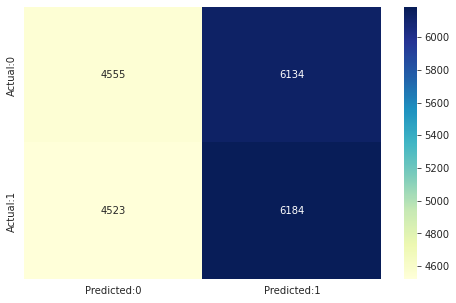

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       0.50      0.43      0.46     10689
           1       0.50      0.58      0.54     10707

    accuracy                           0.50     21396
   macro avg       0.50      0.50      0.50     21396
weighted avg       0.50      0.50      0.50     21396



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
logistic_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

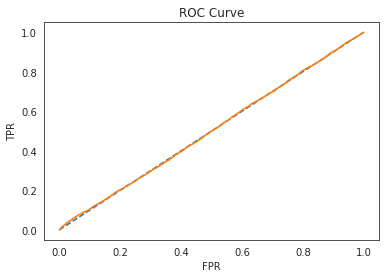

0.5013630836312067


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = logistic.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

Our confusion matrix based on the **Logistic Regression**. It is showing a high number of false positives and false negatives. It is even bad than Decision Tree.

##RandomForest

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.5, random_state=5)

After applying Random Forest we got an accuracy of 75% which is much much better than other models/classifiers used earlier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  75.62628528696953


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       0.83      0.64      0.72     10689
           1       0.71      0.87      0.78     10707

    accuracy                           0.76     21396
   macro avg       0.77      0.76      0.75     21396
weighted avg       0.77      0.76      0.75     21396



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
RandomForest_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

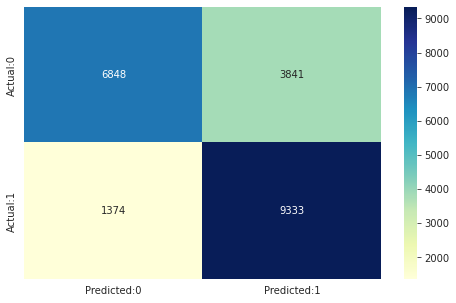

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

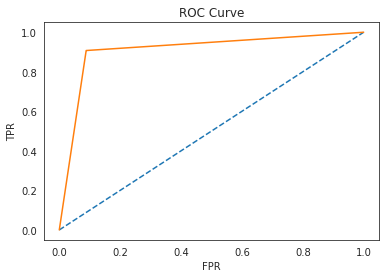

0.909602563797082


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf_entropy.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

**RandomForest** Method proves to be promising than the other methods used. Its accuracy as well as its AUC score proves to be better than the earlier ones.


##Support Vector Machine

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.5, random_state=5)

**Kernels:**

*Linear SVM*

In [ ]:
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.50      0.45      0.47     10689
           1       0.50      0.55      0.52     10707

    accuracy                           0.50     21396
   macro avg       0.50      0.50      0.50     21396
weighted avg       0.50      0.50      0.50     21396

Accuracy:  49.85043933445504




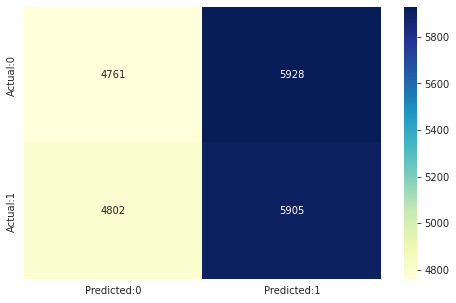

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

*Polynomial*

In [ ]:
classifier = SVC(kernel = 'poly')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.50      0.19      0.27     10689
           1       0.50      0.81      0.62     10707

    accuracy                           0.50     21396
   macro avg       0.50      0.50      0.45     21396
weighted avg       0.50      0.50      0.45     21396

Accuracy:  50.1635819779398




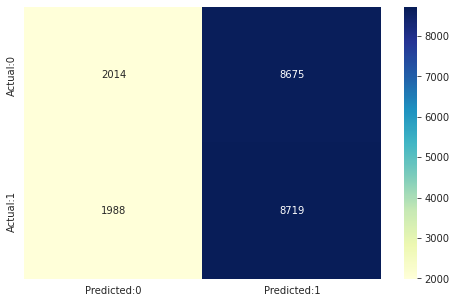

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

*Sigmoid*

In [ ]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     10689
           1       0.50      0.50      0.50     10707

    accuracy                           0.50     21396
   macro avg       0.50      0.50      0.50     21396
weighted avg       0.50      0.50      0.50     21396

Accuracy:  49.9766311460086




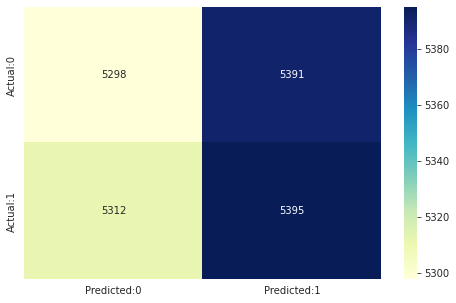

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

*RBF Kernel*

C = 0.1, Gamma = 0.5

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 0.5, C=0.1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     10689
           1       0.00      0.00      0.00     10707

    accuracy                           0.50     21396
   macro avg       0.25      0.50      0.33     21396
weighted avg       0.25      0.50      0.33     21396

Accuracy:  49.95793606281548




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


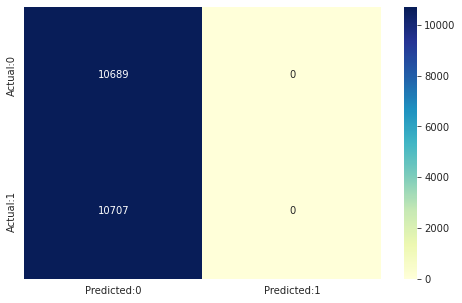

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

C = 0.1, Gamma = 0.1

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 0.1, C=0.1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     10689
           1       0.00      0.00      0.00     10707

    accuracy                           0.50     21396
   macro avg       0.25      0.50      0.33     21396
weighted avg       0.25      0.50      0.33     21396

Accuracy:  49.95793606281548




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


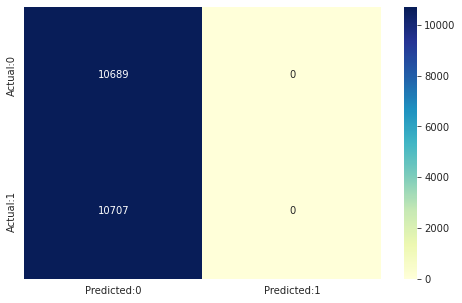

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

C = 1, Gamma = 0.5

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 0.5, C=1, probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.92      0.18      0.29     10689
           1       0.54      0.99      0.70     10707

    accuracy                           0.58     21396
   macro avg       0.73      0.58      0.50     21396
weighted avg       0.73      0.58      0.50     21396

Accuracy:  58.090297251822776




In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
SVM_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

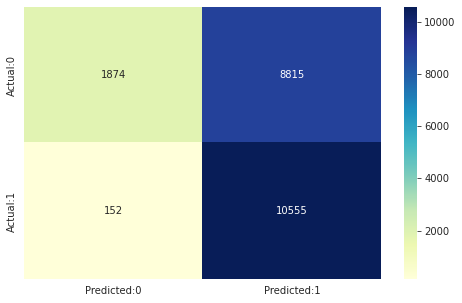

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

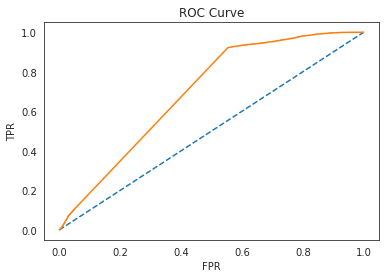

0.6942051920344037


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = classifier.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

C = 1, Gamma = 0.1

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 0.1, C=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print('\n')

Classification: 
               precision    recall  f1-score   support

           0       0.51      0.55      0.53     10689
           1       0.52      0.48      0.49     10707

    accuracy                           0.51     21396
   macro avg       0.51      0.51      0.51     21396
weighted avg       0.51      0.51      0.51     21396

Accuracy:  51.378762385492614




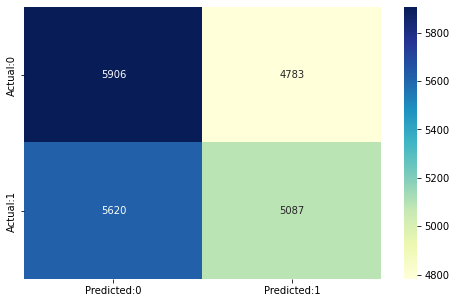

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

##AdaBoost

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_new, y_new, test_size=0.5, random_state=5)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_pred = ada.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  74.10263600673022


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       0.99      0.49      0.65     10689
           1       0.66      0.99      0.79     10707

    accuracy                           0.74     21396
   macro avg       0.82      0.74      0.72     21396
weighted avg       0.82      0.74      0.72     21396



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
Ada_scores = classification_report(
    y_train, y_pred, target_names=target_names, output_dict=True)

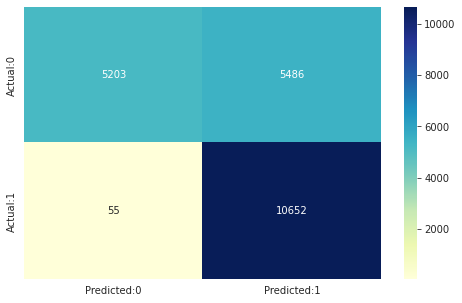

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

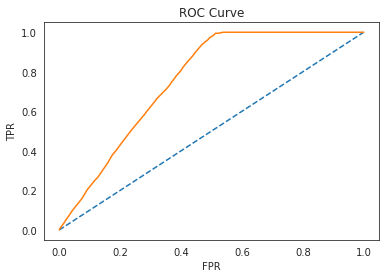

0.7572065398271305


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = ada.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

##XGBBOOST

In [ ]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

model = XGBClassifier()
model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

Accuracy:  76.78070667414471


In [ ]:
print("Classification: \n",classification_report(y_test, y_pred))

Classification: 
               precision    recall  f1-score   support

           0       1.00      0.54      0.70     10689
           1       0.68      1.00      0.81     10707

    accuracy                           0.77     21396
   macro avg       0.84      0.77      0.75     21396
weighted avg       0.84      0.77      0.75     21396



In [ ]:
target_names = ['Safe Driver', 'Non-safe Driver']
XGB_scores = classification_report(
    y_test, y_pred, target_names=target_names, output_dict=True)

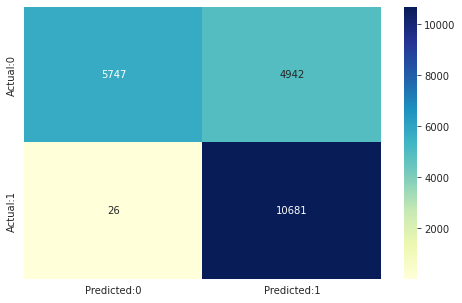

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

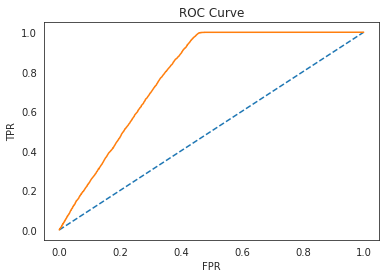

0.7834831680303576


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = model.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probs)
print(auc)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

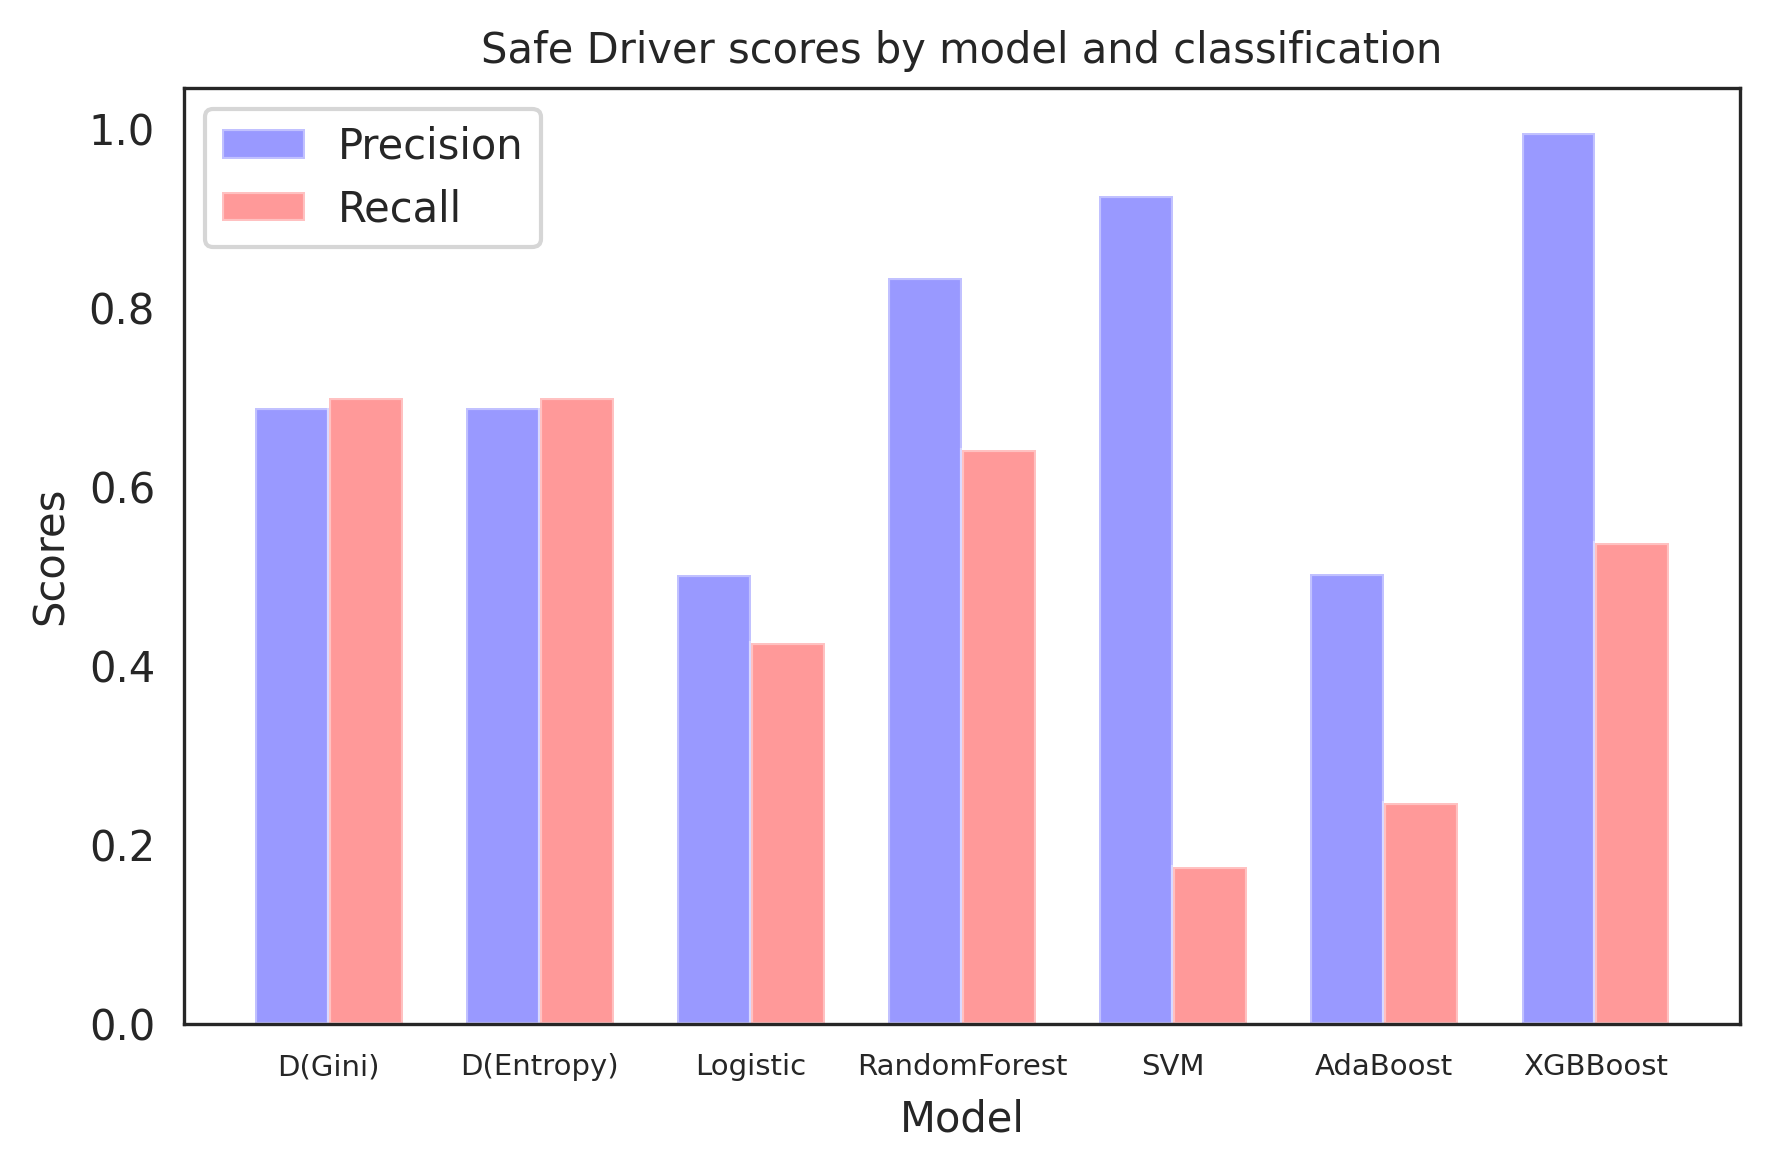

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 300

n_groups = 7

precision = (Decision_gini_scores['Safe Driver']['precision'],
             Decision_entropy_scores['Safe Driver']['precision'],
             logistic_scores['Safe Driver']['precision'],
             RandomForest_scores['Safe Driver']['precision'],
             SVM_scores['Safe Driver']['precision'],
             Ada_scores['Safe Driver']['precision'],
             XGB_scores['Safe Driver']['precision'])

recall = (Decision_gini_scores['Safe Driver']['recall'],
          Decision_entropy_scores['Safe Driver']['recall'],
          logistic_scores['Safe Driver']['recall'],
          RandomForest_scores['Safe Driver']['recall'],
          SVM_scores['Safe Driver']['recall'],
          Ada_scores['Safe Driver']['recall'],
          XGB_scores['Safe Driver']['recall'])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, precision, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Precision')

rects2 = ax.bar(index + bar_width, recall, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Recall')

ax.set_xlabel('Model', fontsize=10)
ax.set_ylabel('Scores', fontsize=10)
ax.set_title('Safe Driver scores by model and classification', fontsize=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('D(Gini)', 'D(Entropy)', 'Logistic', 'RandomForest',
                    'SVM', 'AdaBoost', 'XGBBoost'), fontsize=7)
ax.legend()

fig.tight_layout()

plt.savefig('Safe_Driver_Bargraph_200.eps', dpi=200)

plt.show()

From the above performances it is clear **Decision trees & Logistic Regression** are eliminated in the first step itself. Now, the precision & recall for **SVM & AdaBoost** were promising but the accuracy for both of them was low. 

Now, only two models are left they are **XGBBoost & RandomForest**, they showed promising results considering both the precision, recall & accuracy. Hence, any of the two models would be a good for the dataset.